In [454]:
#eda algerian forest data sheet linear regression


In [13]:
df=pd.read_csv(r"data\\Algerian_forest_fires_dataset_UPDATE.csv",encoding="utf-8")

In [458]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from warnings import filterwarnings
filterwarnings('ignore')
%matplotlib inline

In [460]:
df.tail()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
241,26,9.0,2012.0,30.0,65.0,14.0,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire
242,27,9.0,2012.0,28.0,87.0,15.0,4.4,41.1,6.5,8,0.1,6.2,0,not fire
243,28,9.0,2012.0,27.0,87.0,29.0,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,29,9.0,2012.0,24.0,54.0,18.0,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire
245,30,9.0,2012.0,24.0,64.0,15.0,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire


In [462]:
df.shape

(246, 14)

In [464]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          245 non-null    object 
 1   month        244 non-null    float64
 2   year         244 non-null    float64
 3   Temperature  244 non-null    float64
 4    RH          244 non-null    float64
 5    Ws          244 non-null    float64
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    object 
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    object 
 13  Classes      243 non-null    object 
dtypes: float64(10), object(4)
memory usage: 27.0+ KB


In [466]:
df.isnull().sum()

day            1
month          2
year           2
Temperature    2
 RH            2
 Ws            2
Rain           2
FFMC           2
DMC            2
DC             2
ISI            2
BUI            2
FWI            2
Classes        3
dtype: int64

In [468]:
df.describe()

,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,BUI
count,244.000000,244.0,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,7.500000,2012.0,32.172131,61.938525,15.504098,0.760656,77.887705,14.673361,4.774180,16.664754
std,1.112961,0.0,3.633843,14.884200,2.810178,1.999406,14.337571,12.368039,4.175318,14.204824
min,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,0.000000,1.100000
25%,7.000000,2012.0,30.000000,52.000000,14.000000,0.000000,72.075000,5.800000,1.400000,6.000000
50%,7.500000,2012.0,32.000000,63.000000,15.000000,0.000000,83.500000,11.300000,3.500000,12.250000
75%,8.000000,2012.0,35.000000,73.250000,17.000000,0.500000,88.300000,20.750000,7.300000,22.525000
max,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,19.000000,68.000000


In [470]:
df.iloc[121:125,:]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
121,30,9.0,2012.0,25.0,78.0,14.0,1.4,45.0,1.9,7.5,0.2,2.4,0.1,not fire
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
124,1,6.0,2012.0,32.0,71.0,12.0,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire


In [472]:
df.drop([122,123],inplace=True)

In [474]:
df.reset_index(inplace=True)
df.drop('index',axis=1,inplace=True)

In [476]:
df.loc[:122,"Region"]=0
df.loc[122:,"Region"]=1

In [478]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [480]:
df.columns=df.columns.str.strip()
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [482]:
df.dropna(inplace=True)

In [484]:
df.dtypes

day             object
month          float64
year           float64
Temperature    float64
RH             float64
Ws             float64
Rain           float64
FFMC           float64
DMC            float64
DC              object
ISI            float64
BUI            float64
FWI             object
Classes         object
Region         float64
dtype: object

In [486]:
df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws',"Region"]]=df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws',"Region"]].astype(int)

In [488]:
df.dtypes

day              int32
month            int32
year             int32
Temperature      int32
RH               int32
Ws               int32
Rain           float64
FFMC           float64
DMC            float64
DC              object
ISI            float64
BUI            float64
FWI             object
Classes         object
Region           int32
dtype: object

In [490]:
df.Classes.unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '], dtype=object)

In [492]:
df.Classes=df.Classes.str.strip()
df.Classes.unique()

array(['not fire', 'fire'], dtype=object)

In [494]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [496]:
df[['Rain', 'FFMC','DMC', 'DC', 'ISI', 'BUI', 'FWI']]=df[['Rain', 'FFMC','DMC', 'DC', 'ISI', 'BUI', 'FWI']].astype('float')

In [498]:
df.dtypes

day              int32
month            int32
year             int32
Temperature      int32
RH               int32
Ws               int32
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes         object
Region           int32
dtype: object

In [500]:
df1=df.drop(['year'],axis=1)

In [502]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
day,243.0,15.761317,8.842552,1.0,8.00,16.0,23.00,31.0
month,243.0,7.502058,1.114793,6.0,7.00,8.0,8.00,9.0
Temperature,243.0,32.152263,3.628039,22.0,30.00,32.0,35.00,42.0
RH,243.0,62.041152,14.828160,21.0,52.50,63.0,73.50,90.0
Ws,243.0,15.493827,2.811385,6.0,14.00,15.0,17.00,29.0
Rain,243.0,0.762963,2.003207,0.0,0.00,0.0,0.50,16.8
FFMC,243.0,77.842387,14.349641,28.6,71.85,83.3,88.30,96.0
DMC,243.0,14.680658,12.393040,0.7,5.80,11.3,20.80,65.9
DC,243.0,49.430864,47.665606,6.9,12.35,33.1,69.10,220.4
ISI,243.0,4.742387,4.154234,0.0,1.40,3.5,7.25,19.0


In [504]:
df1['Classes']=np.where(df1['Classes']=='not fire ',0,1)

In [506]:
df1.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,1,0
1,2,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,1,0
2,3,6,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,1,0
3,4,6,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,1,0
4,5,6,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,1,0


In [508]:
df1.corr()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
day,1.000000,-0.000369,0.097227,-0.076034,0.047812,-0.112523,0.224956,0.491514,0.527952,0.180543,0.517117,0.350781,NaN,0.000821
month,-0.000369,1.000000,-0.056781,-0.041252,-0.039880,0.034822,0.017030,0.067943,0.126511,0.065608,0.085073,0.082639,NaN,0.001857
Temperature,0.097227,-0.056781,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,NaN,0.269555
RH,-0.076034,-0.041252,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,NaN,-0.402682
Ws,0.047812,-0.039880,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,NaN,-0.181160
Rain,-0.112523,0.034822,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,NaN,-0.040013
FFMC,0.224956,0.017030,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,NaN,0.222241
DMC,0.491514,0.067943,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,NaN,0.192089
DC,0.527952,0.126511,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,NaN,-0.078734
ISI,0.180543,0.065608,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,NaN,0.263197


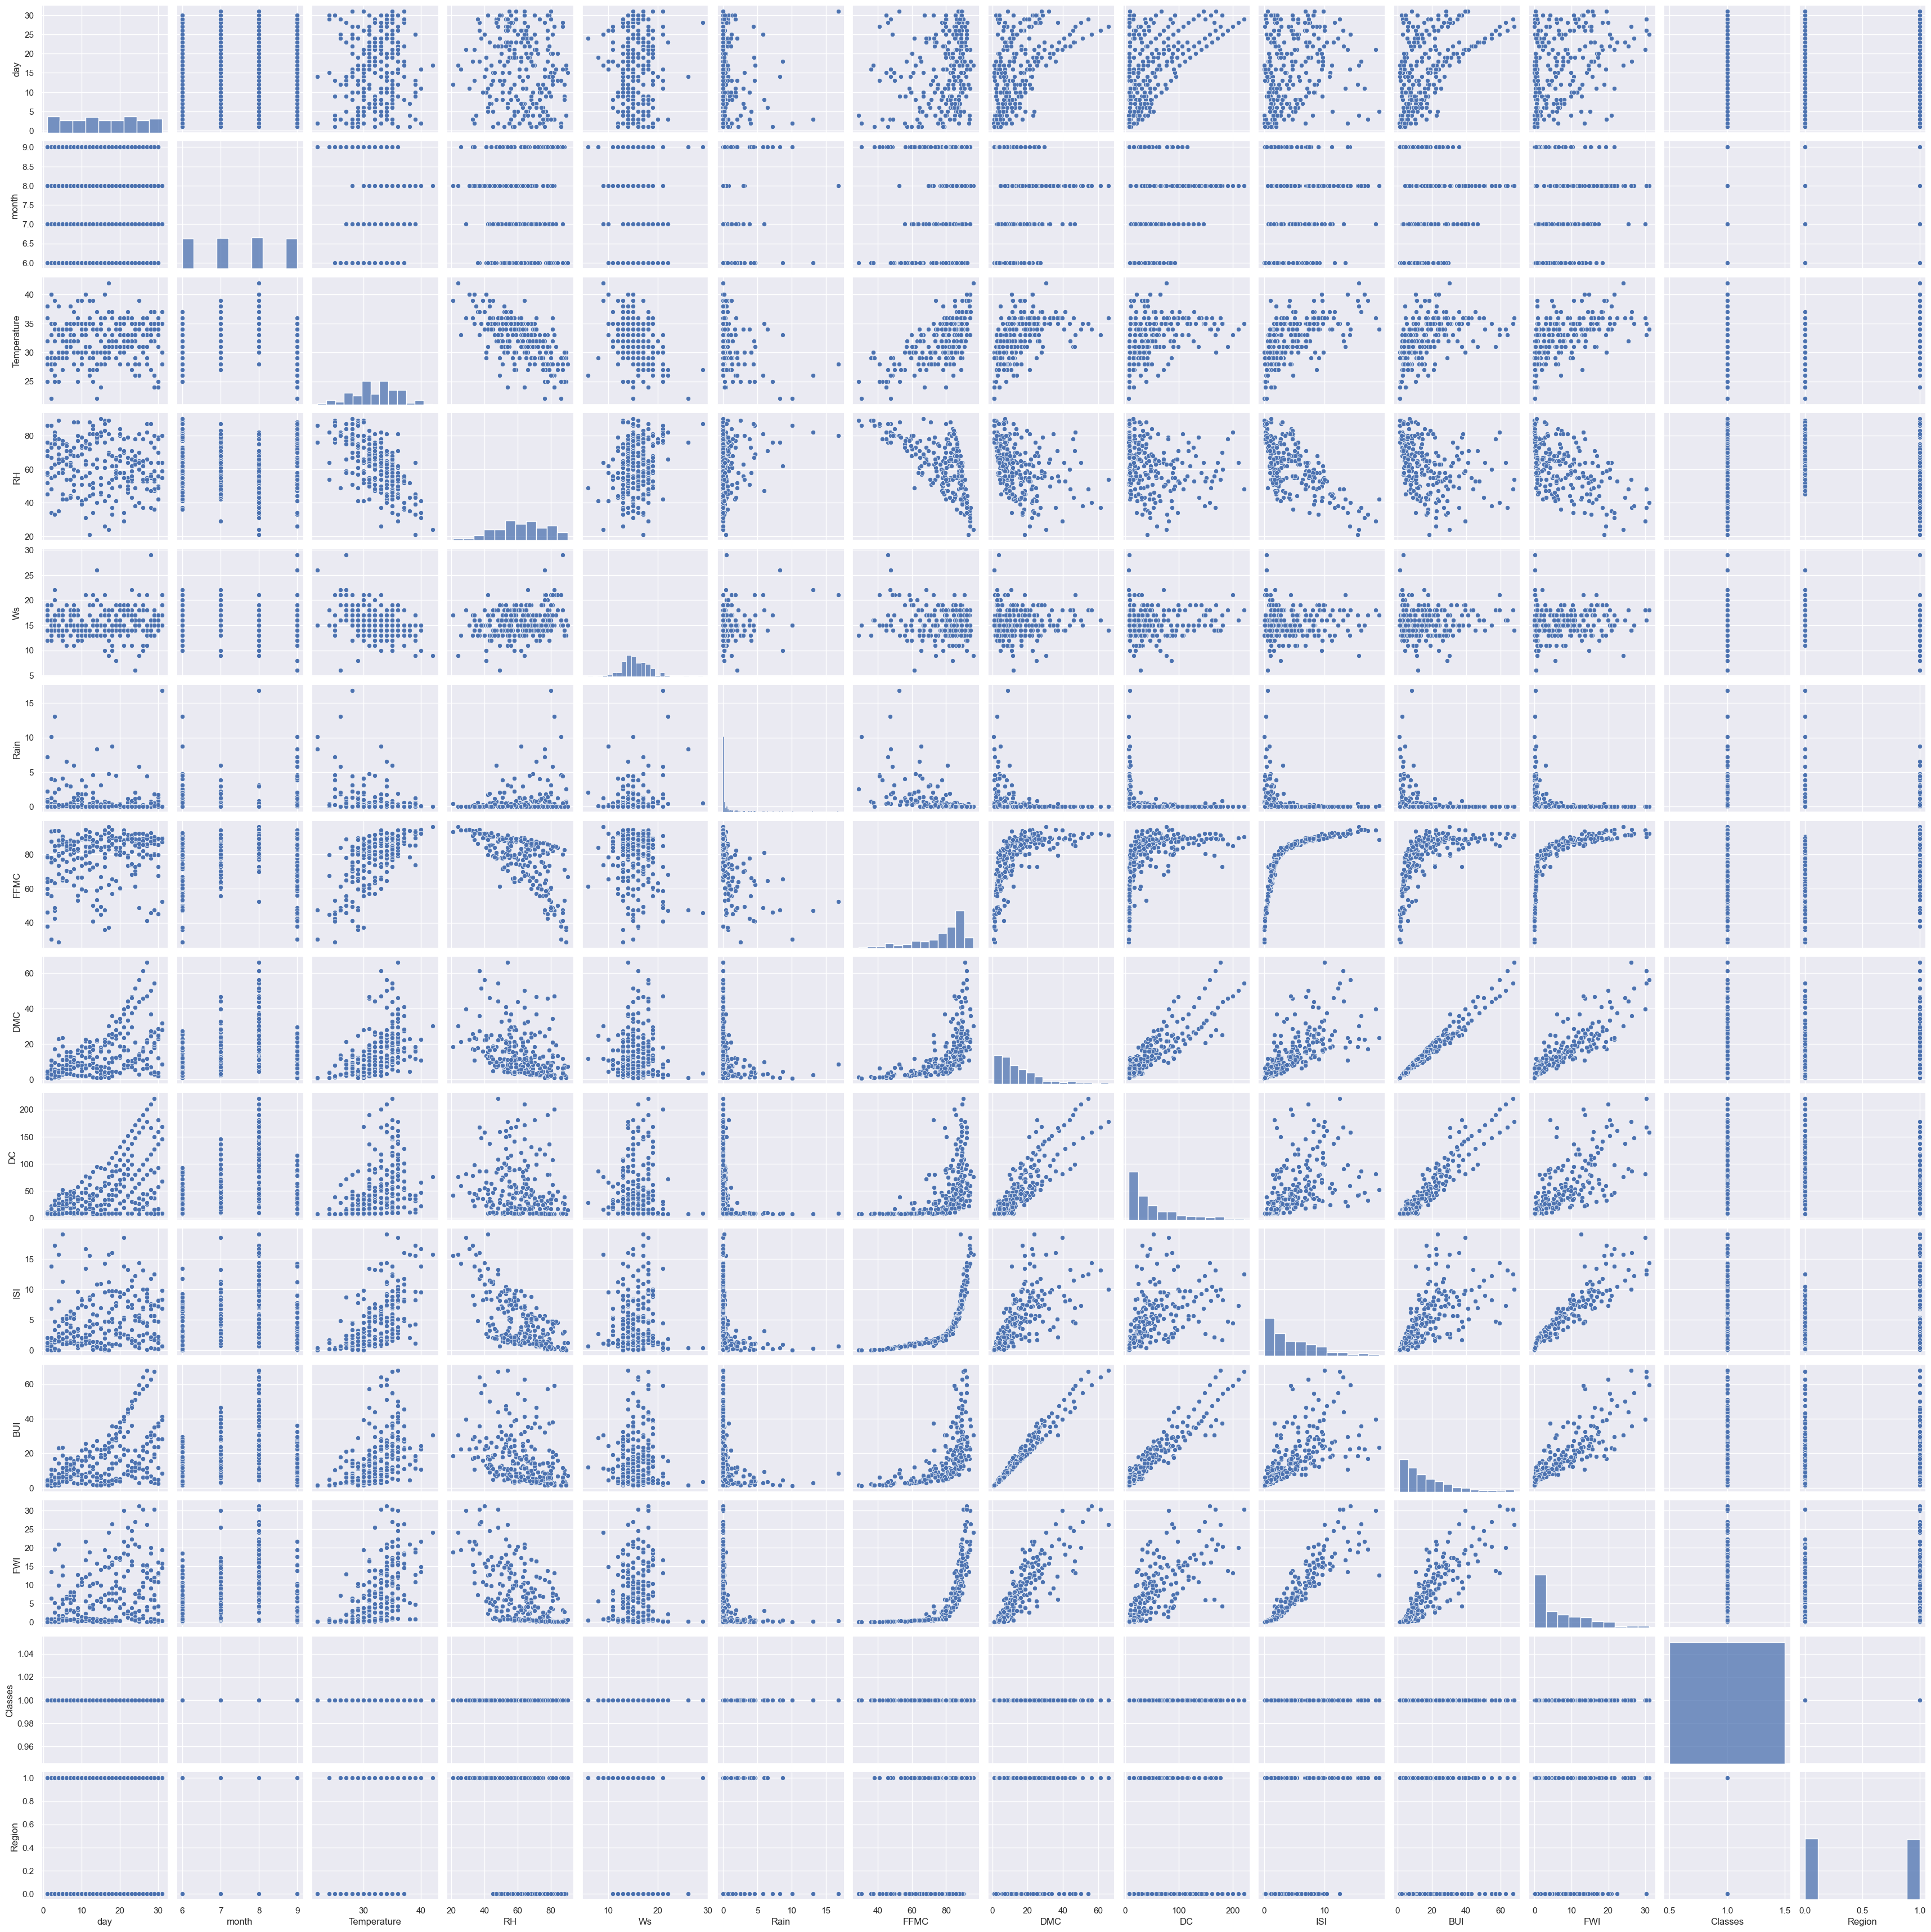

In [510]:
sns.pairplot(df1)

<Axes: >

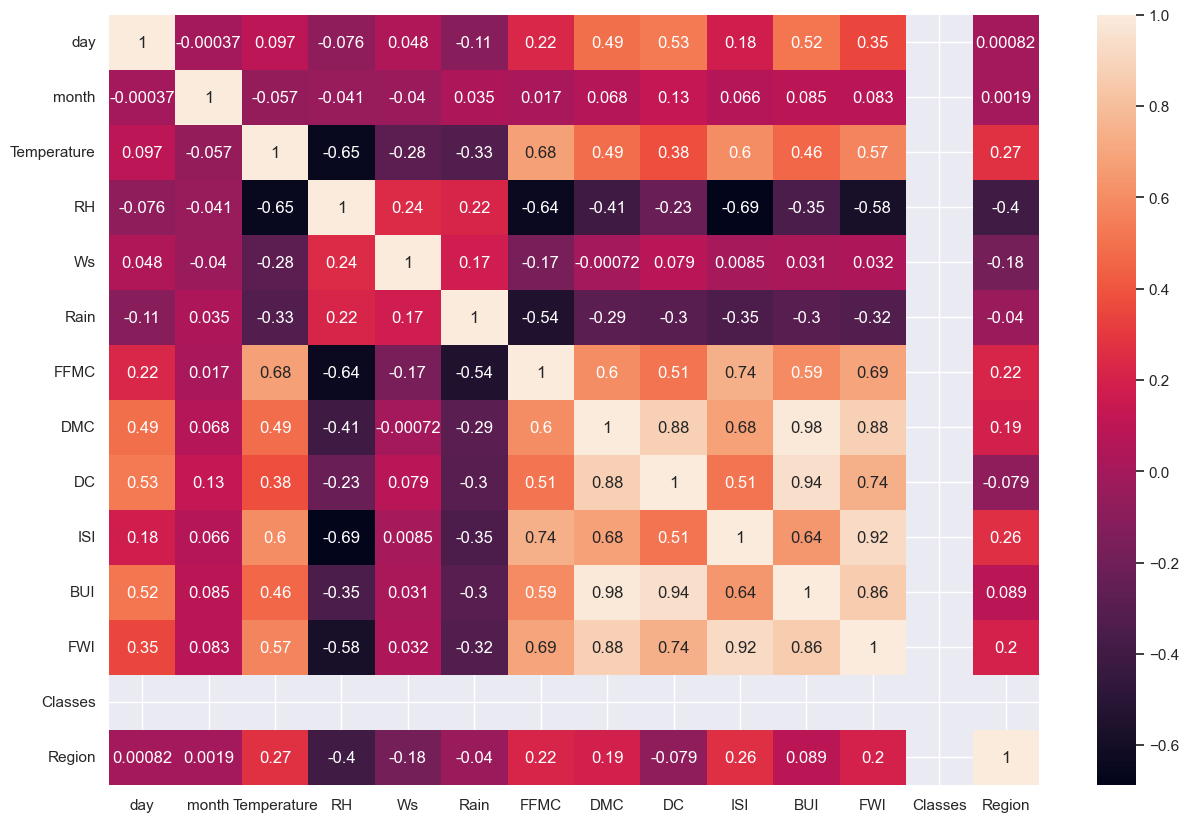

In [511]:
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(df1.corr(),annot=True)

In [512]:
df1.columns

Index(['day', 'month', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC',
       'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

Text(0, 0.5, 'Temperature')

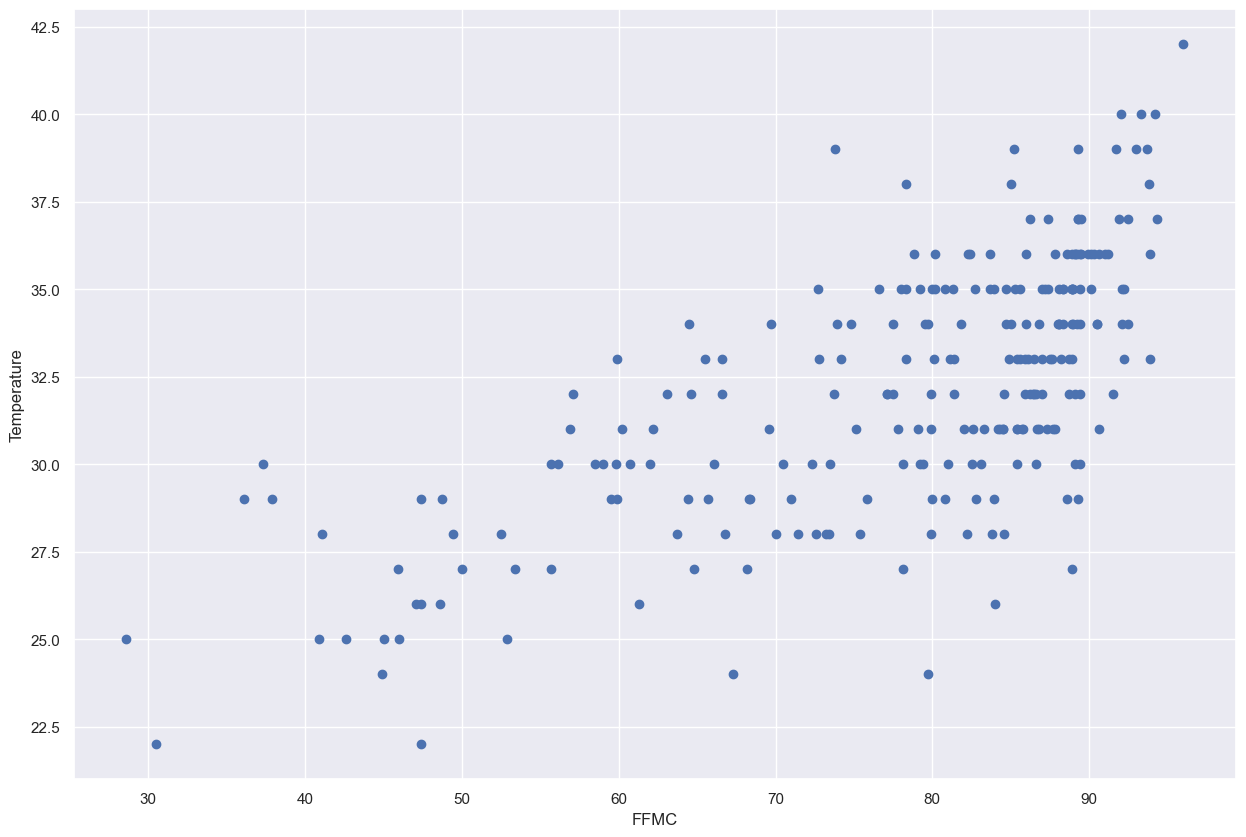

In [513]:
plt.scatter(df1['FFMC'],df1['Temperature'])
plt.xlabel("FFMC")
plt.ylabel("Temperature")

<Axes: xlabel='FFMC', ylabel='Temperature'>

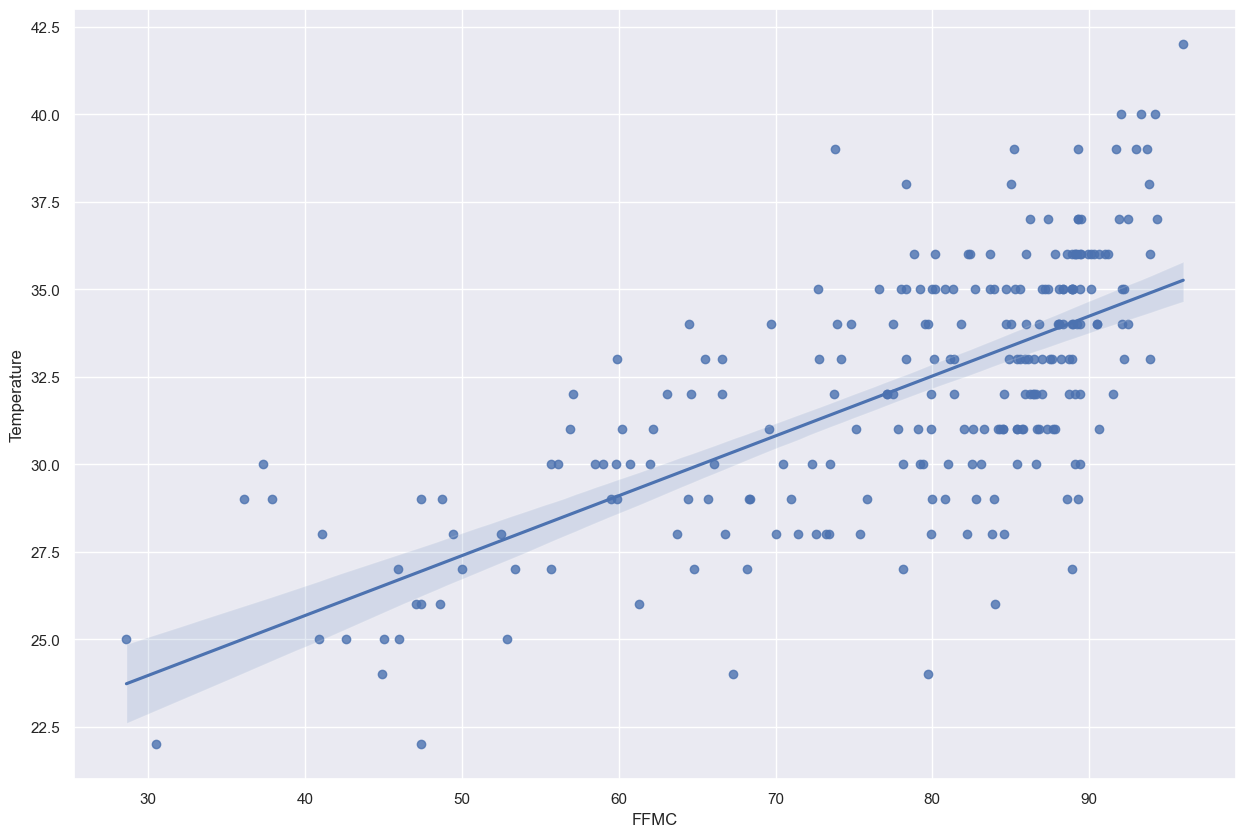

In [514]:
sns.regplot(x='FFMC',y='Temperature',data=df1)

Text(0, 0.5, 'Temperature')

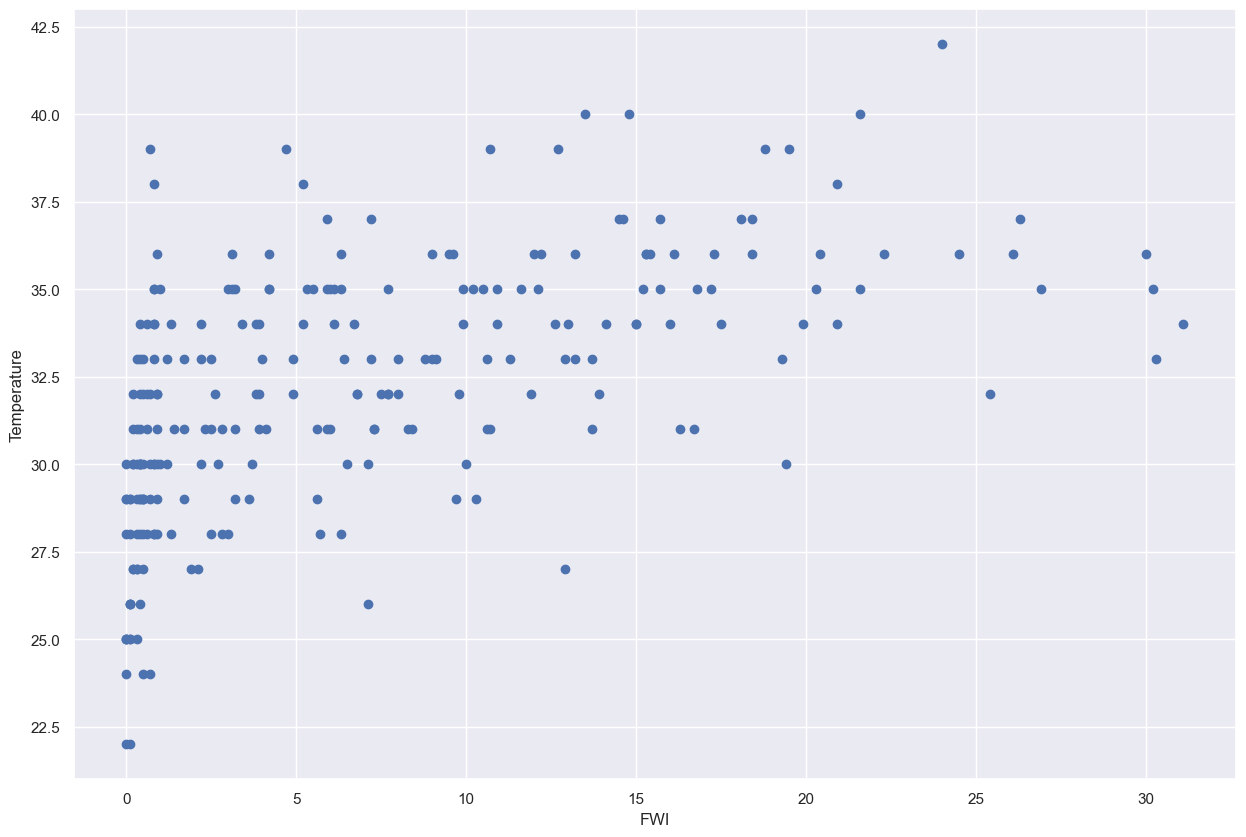

In [515]:
plt.scatter(df1['FWI'],df1['Temperature'])
plt.xlabel("FWI")
plt.ylabel("Temperature")

<Axes: xlabel='FWI', ylabel='Temperature'>

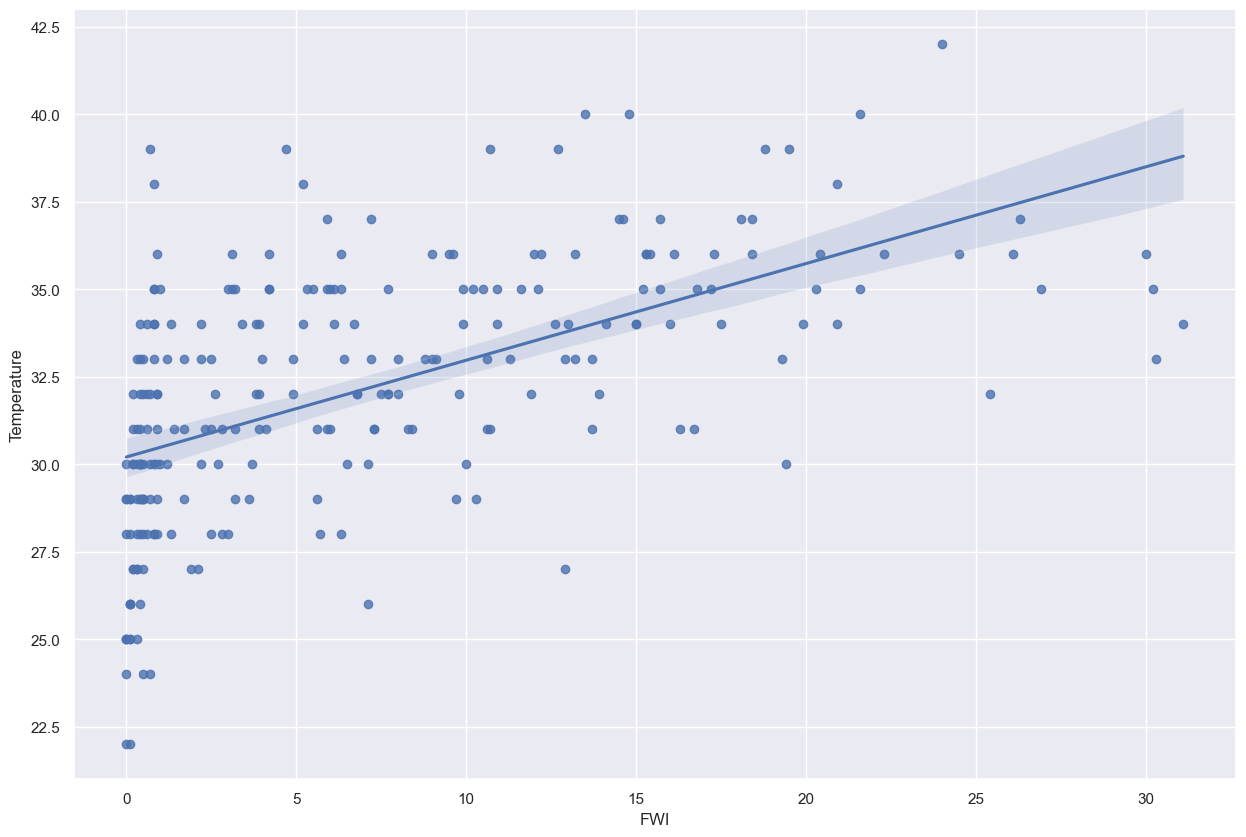

In [516]:
sns.regplot(x='FWI',y='Temperature',data=df1)

Text(0, 0.5, 'Temperature')

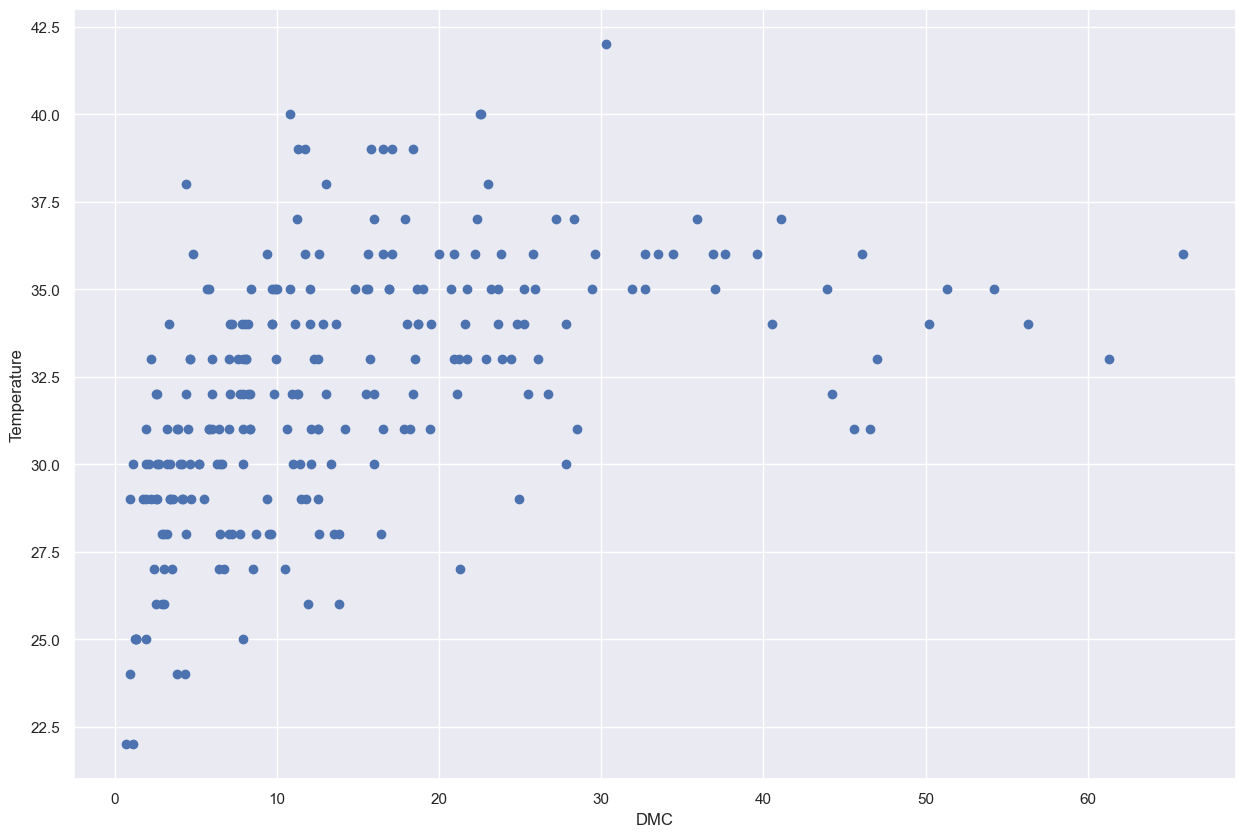

In [517]:
plt.scatter(df1['DMC'],df1['Temperature'])
plt.xlabel("DMC")
plt.ylabel("Temperature")

<Axes: xlabel='DMC', ylabel='Temperature'>

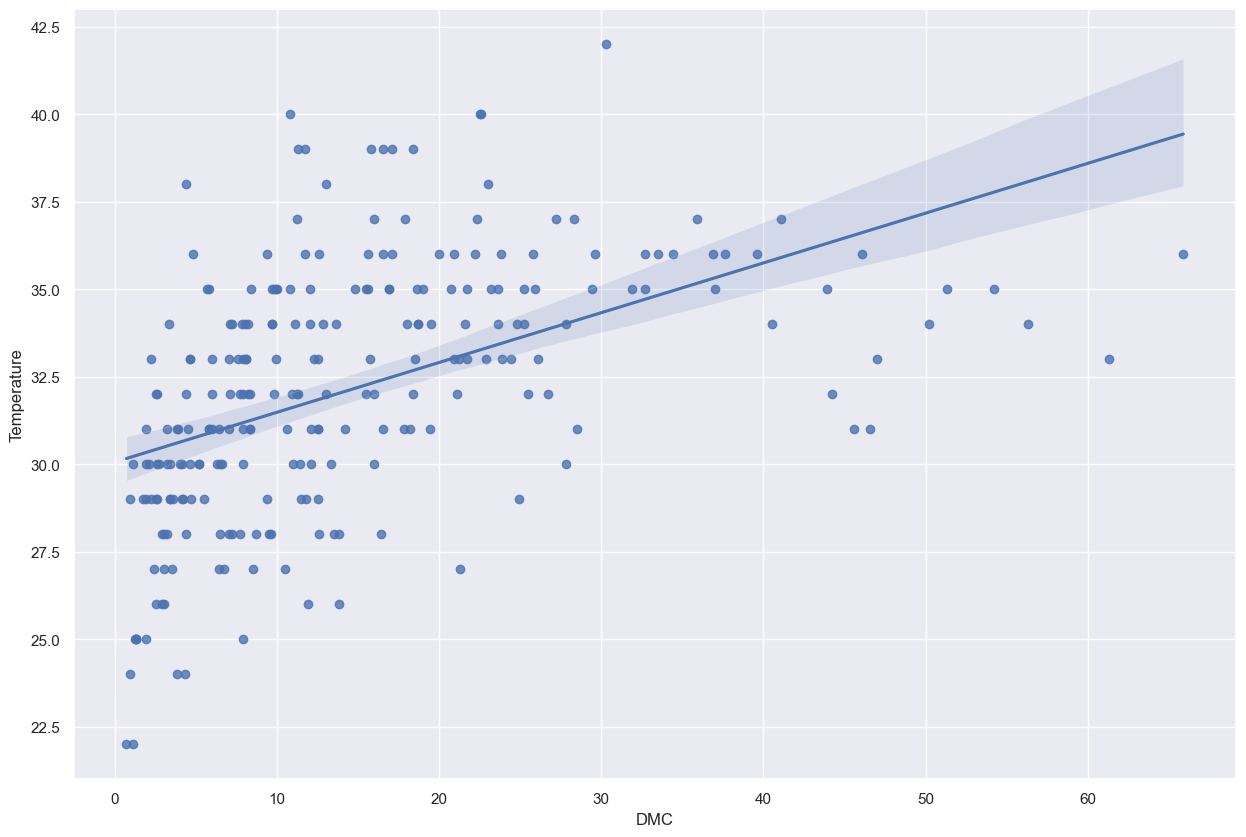

In [518]:
sns.regplot(x='DMC',y='Temperature',data=df1)

array([[<Axes: title={'center': 'day'}>,
        <Axes: title={'center': 'month'}>,
        <Axes: title={'center': 'Temperature'}>,
        <Axes: title={'center': 'RH'}>],
       [<Axes: title={'center': 'Ws'}>, <Axes: title={'center': 'Rain'}>,
        <Axes: title={'center': 'FFMC'}>,
        <Axes: title={'center': 'DMC'}>],
       [<Axes: title={'center': 'DC'}>, <Axes: title={'center': 'ISI'}>,
        <Axes: title={'center': 'BUI'}>, <Axes: title={'center': 'FWI'}>],
       [<Axes: title={'center': 'Classes'}>,
        <Axes: title={'center': 'Region'}>, <Axes: >, <Axes: >]],
      dtype=object)

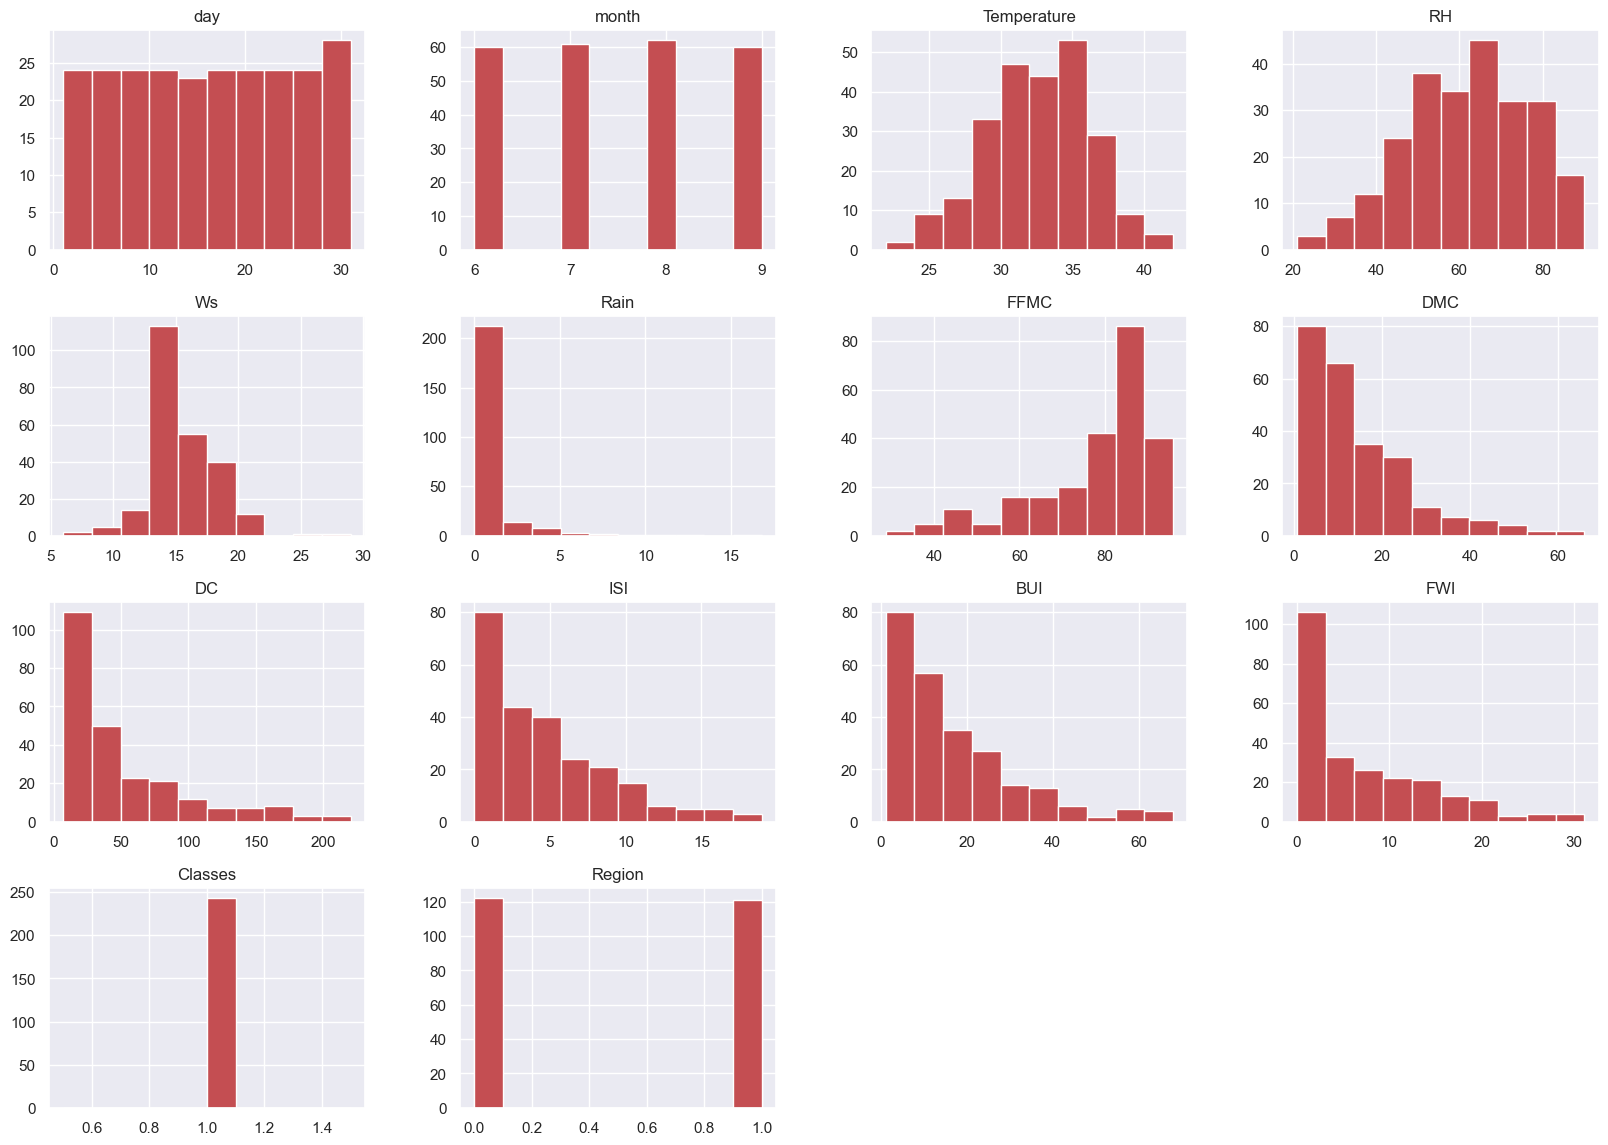

In [519]:
df1.hist(figsize=(20,14),color='r')

In [520]:
percentage=df.Classes.value_counts(normalize=True)*100
percentage

Classes
fire        56.378601
not fire    43.621399
Name: proportion, dtype: float64

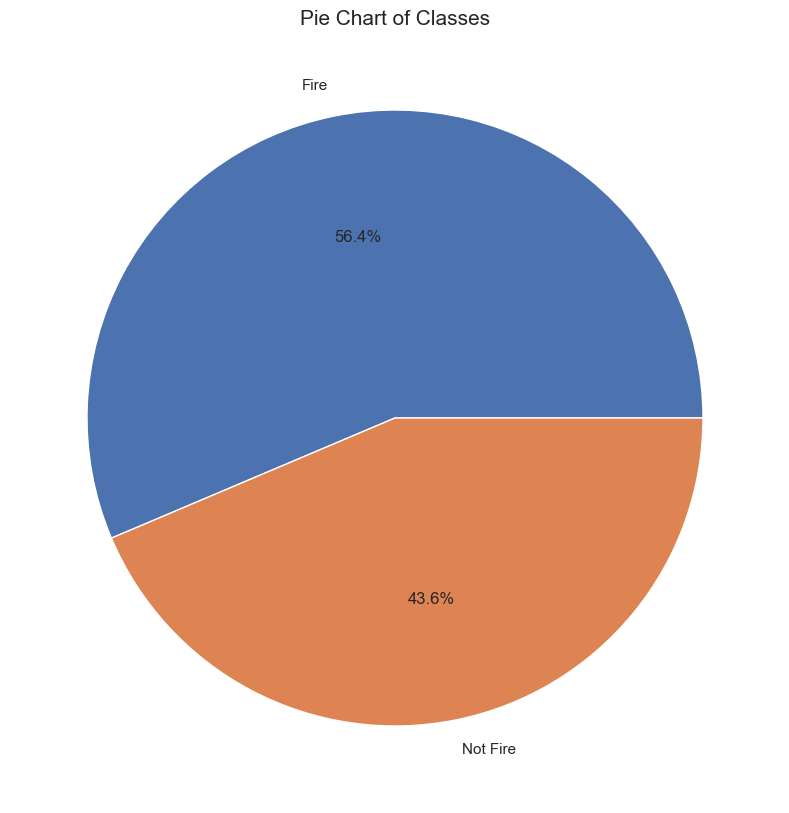

In [521]:
classes_labels=['Fire','Not Fire']
plt.figure(figsize=(15,10))
plt.pie(percentage,labels=classes_labels,autopct="%1.1f%%")
plt.title("Pie Chart of Classes",fontsize=15)
plt.show()

<Axes: ylabel='Temperature'>

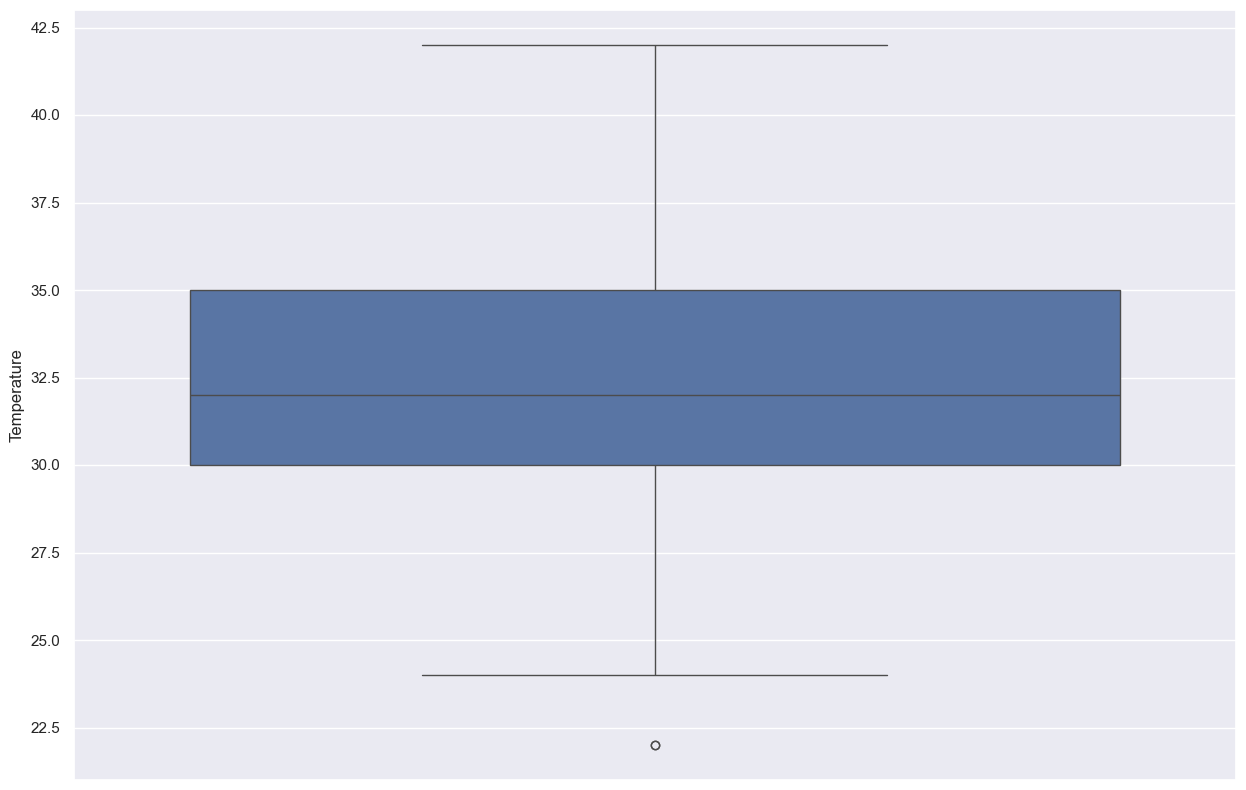

In [522]:
sns.boxplot(df1['Temperature'])

<Axes: ylabel='FWI'>

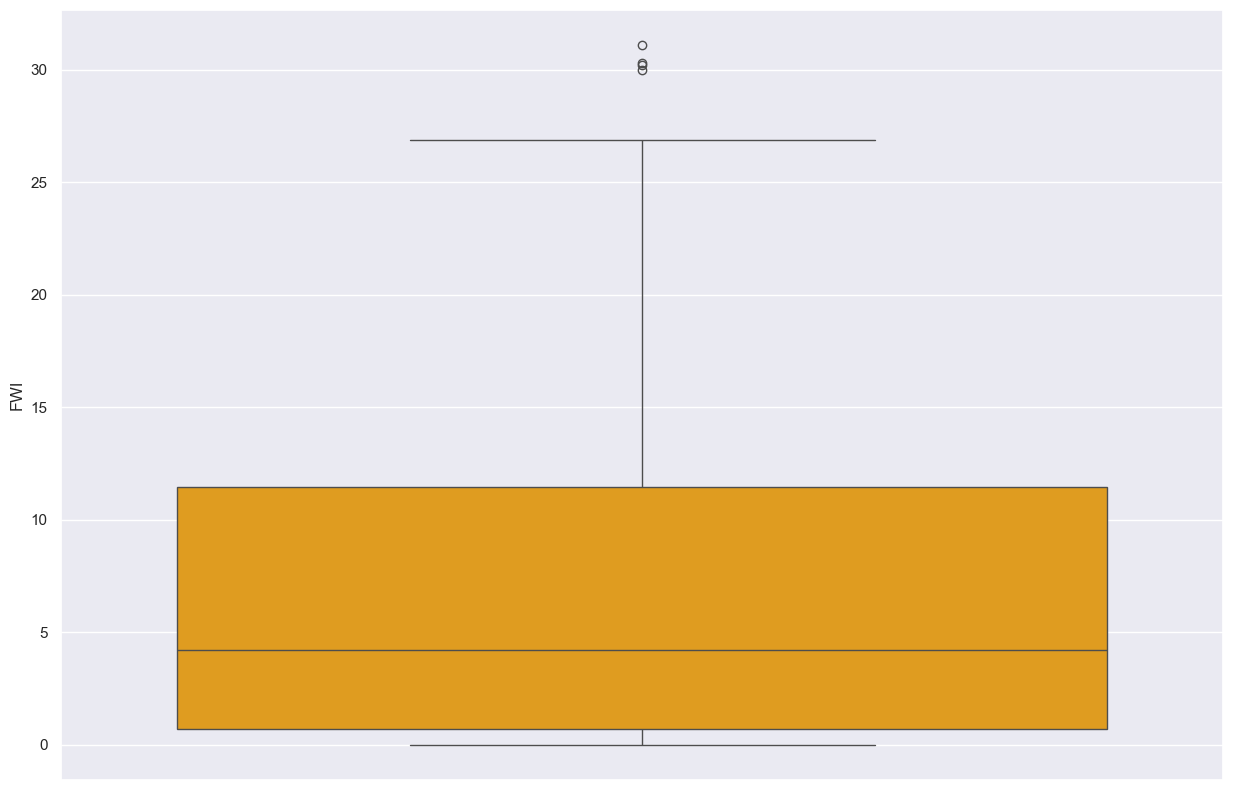

In [523]:
sns.boxplot(df['FWI'],color='orange')

In [524]:
df1

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,1,0
1,2,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,1,0
2,3,6,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,1,0
3,4,6,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,1,0
4,5,6,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,9,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
240,27,9,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,1,1
241,28,9,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,1,1
242,29,9,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,1,1


In [525]:
x=df1.drop('Temperature',axis=1)

In [526]:
y=df1['Temperature']

In [527]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.33, random_state=10)

In [528]:
X_train

,day,month,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
25,26,6,64,18,0.0,86.8,17.8,71.8,6.7,21.6,10.6,1,0
121,30,9,78,14,1.4,45.0,1.9,7.5,0.2,2.4,0.1,1,0
174,23,7,71,17,0.0,87.3,46.6,99.0,6.9,46.5,16.3,1,1
72,12,8,51,13,0.3,81.3,15.6,75.1,2.5,20.7,4.2,1,0
186,4,8,35,15,0.0,93.8,23.0,42.7,15.7,22.9,20.9,1,1
231,18,9,33,13,0.1,90.6,25.8,77.8,9.0,28.2,15.4,1,1
168,17,7,81,17,0.0,84.6,21.1,42.3,4.7,20.9,7.7,1,1
204,22,8,53,14,0.0,89.5,41.1,127.5,8.0,45.5,18.1,1,1
228,15,9,51,13,0.0,88.7,16.0,50.2,6.9,17.8,9.8,1,1
219,6,9,71,14,6.5,64.5,3.3,9.1,1.0,3.5,0.4,1,1


In [529]:
X_test

,day,month,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
46,17,7,70,14,0.0,82.8,9.4,34.1,3.2,11.1,3.6,1,0
226,13,9,49,19,0.0,88.6,11.5,33.4,9.1,12.4,10.3,1,1
181,30,7,56,16,0.0,88.9,23.8,57.1,8.2,23.8,13.2,1,1
116,25,9,81,21,5.8,48.6,3.0,7.7,0.4,3.0,0.1,1,0
124,3,6,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,1,1
170,19,7,58,16,0.0,88.1,27.8,61.1,7.3,27.7,13.0,1,1
68,8,8,60,18,0.3,77.1,11.3,47.0,2.2,14.1,2.6,1,0
171,20,7,50,16,0.0,89.9,32.7,71.0,9.5,32.6,17.3,1,1
146,25,6,70,16,0.0,86.0,12.8,25.6,5.4,12.7,6.7,1,1
119,28,9,47,14,0.7,77.5,7.1,8.8,1.8,6.8,0.9,1,0


In [530]:
y_train

25     31
121    25
174    31
72     35
186    38
231    36
168    32
204    37
228    32
219    34
159    35
43     34
173    32
21     31
154    34
37     33
203    36
75     36
192    39
48     35
191    39
220    31
184    40
194    39
99     30
95     29
189    34
67     32
66     32
172    36
22     32
38     32
239    30
230    34
101    33
197    35
241    27
213    30
129    28
216    28
202    36
114    32
152    28
90     35
41     31
80     35
105    22
81     36
132    31
110    29
53     28
17     31
155    34
51     28
14     28
214    29
82     36
84     34
225    31
29     33
3      25
23     32
128    35
45     28
227    28
97     29
196    37
42     34
163    36
79     35
235    33
12     27
112    31
11     26
190    37
85     35
134    30
143    33
166    34
183    38
104    25
34     33
108    31
50     33
167    31
179    33
212    34
4      27
133    27
44     30
96     29
217    30
28     32
135    27
175    33
145    35
187    34
221    30
71     35
118    31


In [531]:
y_test

46     29
226    29
181    36
116    26
124    29
170    34
68     32
171    36
146    34
119    32
177    35
35     32
195    35
59     31
211    35
26     34
120    26
185    39
10     31
91     28
76     36
188    30
60     35
176    39
98     31
147    36
117    31
130    27
63     35
237    26
6      33
142    32
160    36
24     31
87     33
19     30
161    34
144    33
55     36
61     36
182    37
131    30
70     35
232    29
69     35
200    37
162    34
56     36
215    28
20     30
47     31
199    42
5      31
109    32
106    24
206    35
148    36
233    34
136    28
49     33
58     32
1      29
2      26
149    37
209    36
103    29
52     27
138    31
205    36
32     32
111    28
7      30
243    24
39     33
83     36
169    33
127    35
242    24
208    33
102    30
78     36
Name: Temperature, dtype: int32

In [532]:
scaler=StandardScaler()

In [533]:
x_train_scaled=scaler.fit_transform(X_train)

In [534]:
x_train_scaled

array([[ 1.30705791, -1.39305207,  0.06835876, ...,  0.52024214,
         0.        , -1.01242284],
       [ 1.77217242,  1.29354835,  0.99672801, ..., -0.93452011,
         0.        , -1.01242284],
       [ 0.95822202, -0.4975186 ,  0.53254338, ...,  1.30997022,
         0.        ,  0.9877296 ],
       ...,
       [ 0.14427163,  1.29354835, -2.45150064, ...,  1.72561657,
         0.        ,  0.9877296 ],
       [-1.2510719 , -1.39305207,  0.06835876, ..., -0.8098262 ,
         0.        ,  0.9877296 ],
       [-0.55340014, -1.39305207,  1.0630401 , ..., -0.82368108,
         0.        , -1.01242284]])

In [535]:
x_test_scaled=scaler.transform(X_test)

In [536]:
x_test_scaled

array([[ 0.26055026, -0.4975186 ,  0.46623129, ..., -0.44959936,
         0.        , -1.01242284],
       [-0.20456425,  1.29354835, -0.92632258, ...,  0.4786775 ,
         0.        ,  0.9877296 ],
       [ 1.77217242, -0.4975186 , -0.46213796, ...,  0.88046898,
         0.        ,  0.9877296 ],
       ...,
       [ 1.30705791,  0.39801488, -1.72206765, ...,  3.24965322,
         0.        ,  0.9877296 ],
       [-0.43712151,  1.29354835,  0.93041592, ..., -0.90681035,
         0.        , -1.01242284],
       [ 0.37682889,  0.39801488, -0.59476213, ...,  1.28226046,
         0.        , -1.01242284]])

In [537]:
regression=LinearRegression()

In [538]:
regression.fit(x_train_scaled,y_train)

LinearRegression()

In [539]:
#print the coefficients & intercept
print(regression.coef_)
#regression.score(x_test_scaled,y_test)

[-0.36440793 -0.22635361 -1.44134283 -0.7142619  -0.23278709  0.96421264
 -0.01542755  0.65162217  0.13076922  0.26277398 -0.28088408  0.
  0.24272792]


In [540]:
print(regression.intercept_)

32.074074074074076


In [541]:
reg_pred=regression.predict(x_test_scaled)

In [542]:
reg_pred

array([31.84063173, 33.08286672, 33.29508782, 24.75854227, 29.24684893,
       33.62257975, 31.75352242, 34.58358479, 31.72328528, 32.36866716,
       33.67767751, 33.25839479, 35.65738396, 31.97503396, 34.04296478,
       33.22479669, 26.47624061, 36.04714436, 33.19344089, 23.64162513,
       32.1343707 , 32.60093493, 33.02495519, 32.94209422, 29.99121682,
       32.68893888, 33.04332061, 32.27268269, 32.09347766, 34.07041738,
       34.51057574, 33.74628677, 34.33569821, 32.69179752, 31.163211  ,
       28.76146317, 32.70115088, 31.76403503, 33.04719502, 34.07436881,
       33.80864285, 35.5411224 , 34.22166608, 37.18514799, 32.83625502,
       36.64474361, 32.38777677, 35.33018647, 30.75190986, 30.94859328,
       32.28439034, 39.1982583 , 32.58656685, 34.55522617, 27.14324627,
       36.9254135 , 33.79514082, 33.90475288, 29.13300329, 32.27931989,
       32.48201446, 32.01342537, 24.82170293, 36.32093954, 36.06160239,
       29.12469145, 29.4759838 , 29.4409954 , 36.02022222, 28.49

Text(0, 0.5, 'Test Predicted Data')

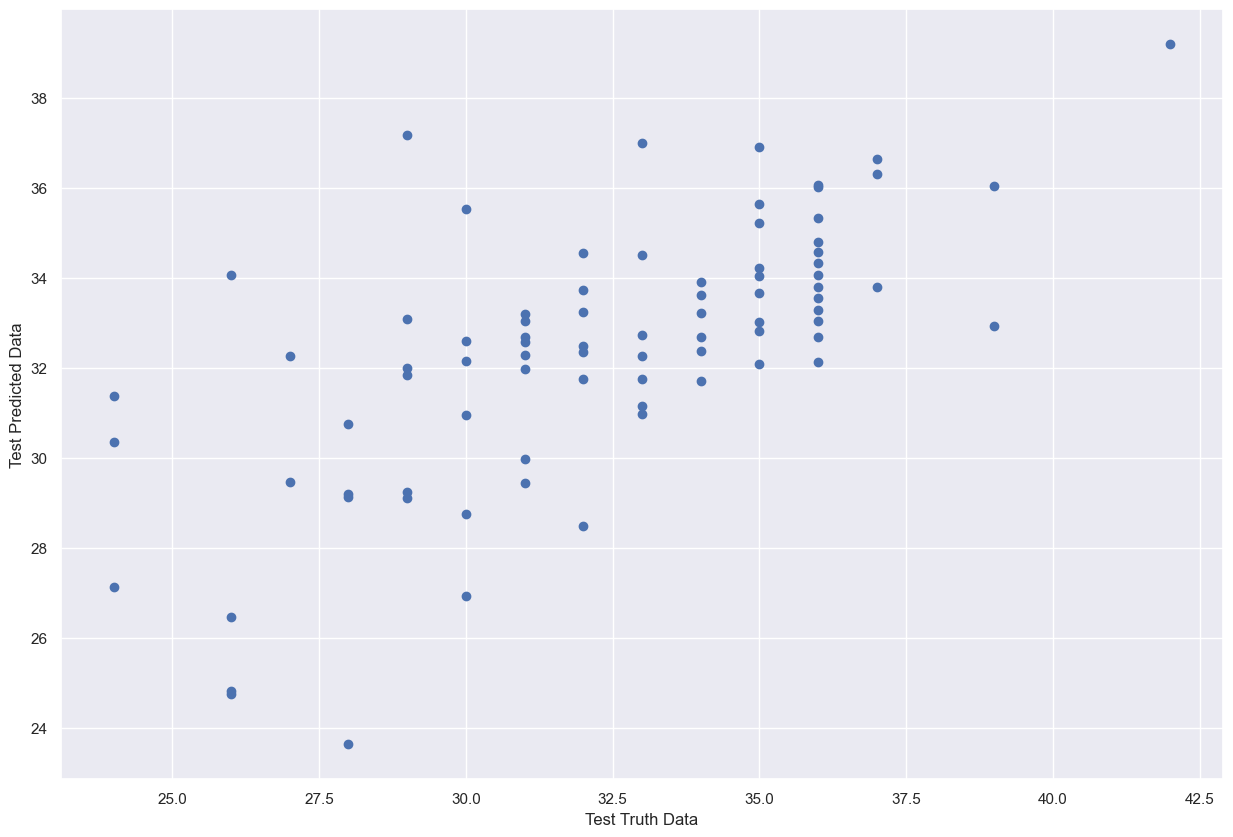

In [543]:
#if we are plotting  y_test,reg_pred relation should be linear
plt.scatter(y_test,reg_pred)
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")

In [544]:
residuals=y_test-reg_pred

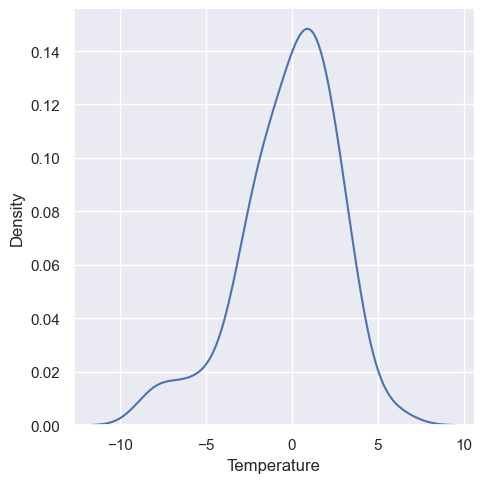

In [545]:
sns.displot(residuals,kind="kde")

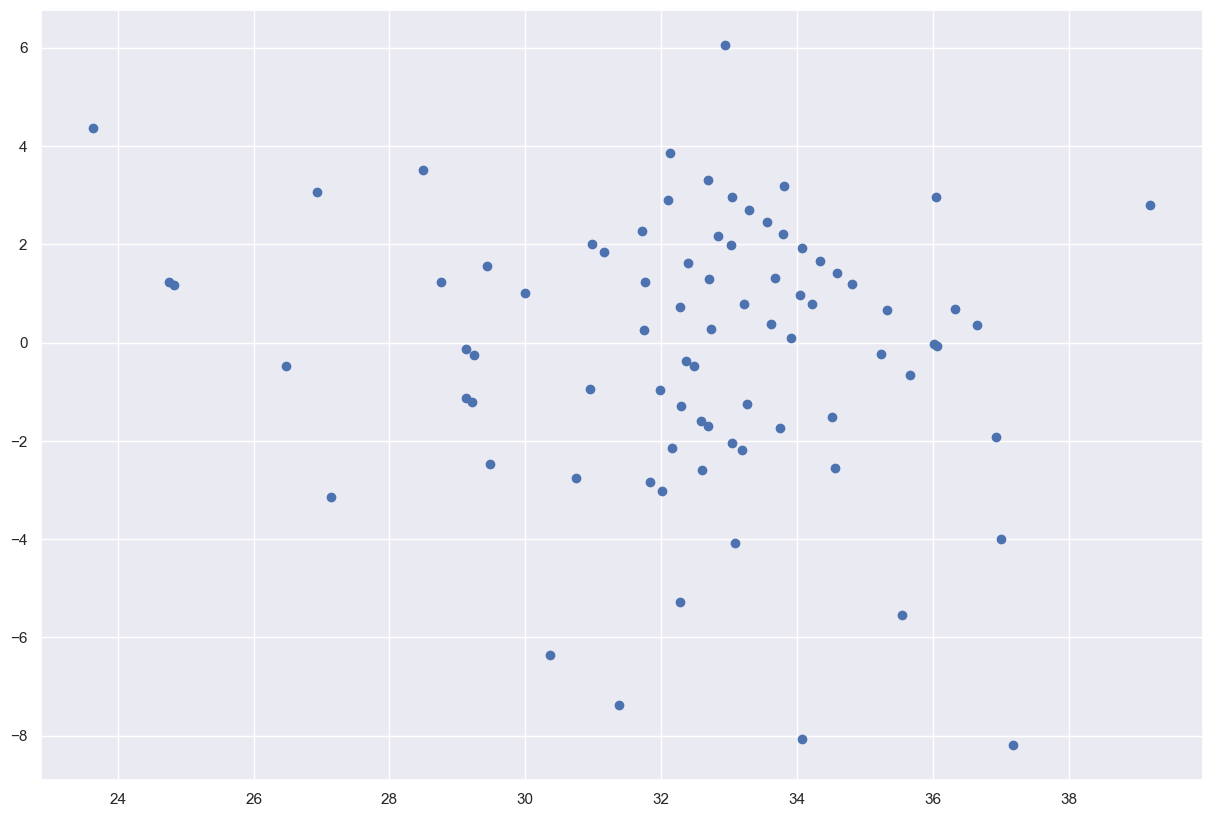

In [546]:
plt.scatter(reg_pred,residuals)

In [547]:
print(mean_squared_error(y_test,reg_pred))
print(mean_absolute_error(y_test,reg_pred))
print(np.sqrt(mean_squared_error(y_test,reg_pred)))

7.718372490369681
2.1359729920427832
2.778195905685861


In [548]:
score=r2_score(y_test,reg_pred)
score

0.4424354585867669

In [549]:
## Adjusted R square
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-x_test_scaled.shape[1]-1)

0.33425129383494556

In [550]:
ridge=Ridge()

In [551]:
ridge.fit(x_train_scaled,y_train)

Ridge()

In [552]:
print(ridge.coef_)

[-0.35859242 -0.22361881 -1.4246319  -0.71357223 -0.23419537  0.96377519
  0.02101355  0.62937949  0.10421058  0.21661456 -0.22339104  0.
  0.23878478]


In [553]:
print(ridge.intercept_)

32.074074074074076


In [554]:
print(ridge.intercept_)

32.074074074074076


In [555]:
ridge_pred=ridge.predict(x_test_scaled)

In [556]:
ridge_pred

array([31.84522025, 33.07801866, 33.32143372, 24.79311009, 29.25112242,
       33.64529216, 31.73250629, 34.61248132, 31.74324356, 32.36616109,
       33.66795511, 33.25653199, 35.63844353, 31.96899817, 33.96914585,
       33.23538038, 26.51482354, 36.03947803, 33.1811996 , 23.66716673,
       32.09793728, 32.58109242, 33.0232019 , 32.94038806, 29.98560291,
       32.70770994, 33.04393524, 32.25760392, 32.08900203, 34.04925765,
       34.50009163, 33.73910985, 34.31012523, 32.69207555, 31.13817866,
       28.77144618, 32.67740941, 31.75746455, 33.04099284, 34.04747401,
       33.83814527, 35.52736647, 34.22117957, 37.13751492, 32.83627381,
       36.68161808, 32.36960708, 35.31854183, 30.73882088, 30.95562496,
       32.291368  , 39.20825907, 32.57797449, 34.55202448, 27.17475543,
       36.9522104 , 33.81487792, 33.86236693, 29.15322938, 32.26413039,
       32.47914425, 32.00320521, 24.82974268, 36.34245785, 36.10298328,
       29.15073976, 29.45086263, 29.43904153, 36.0418111 , 28.50

Text(0, 0.5, 'Test Predicted Data')

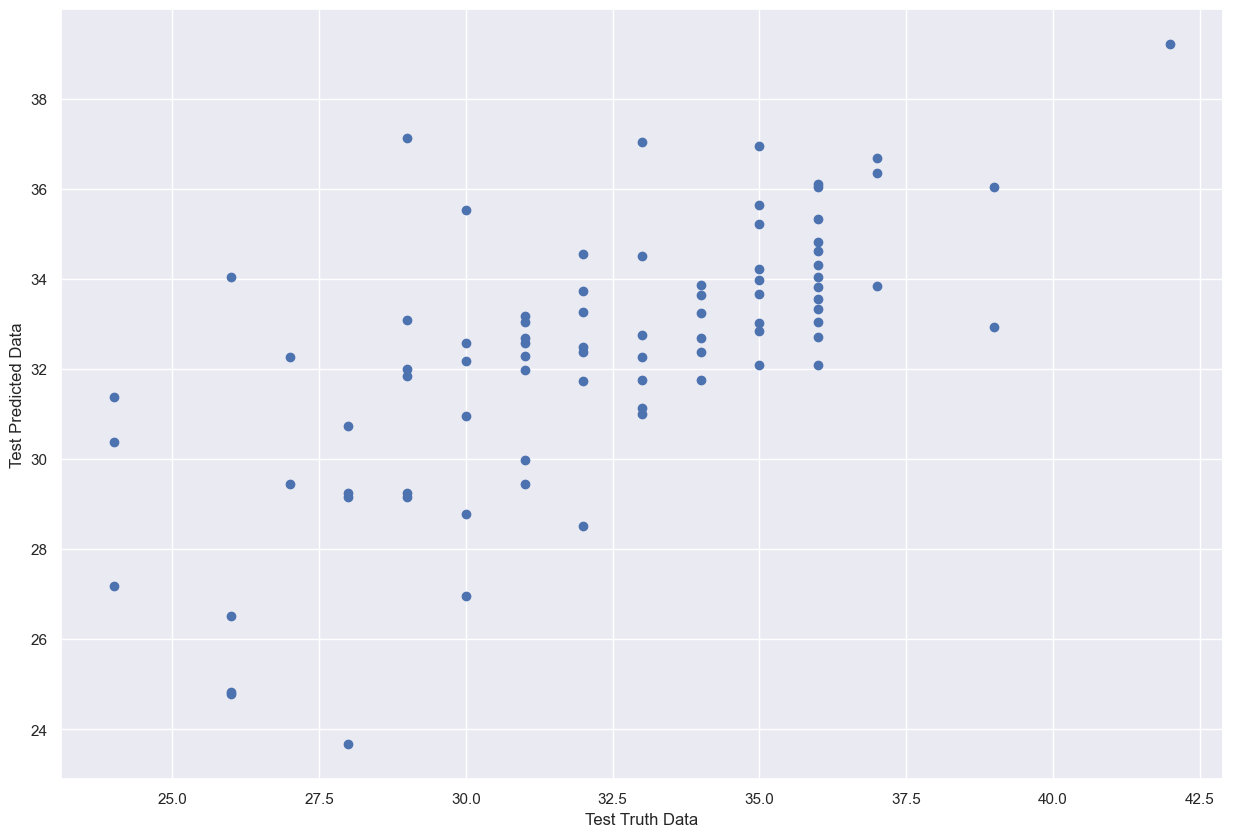

In [557]:
#if we are plotting  y_test,reg_pred relation should be linear
plt.scatter(y_test,ridge_pred)
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")

In [558]:
residuals=y_test-ridge_pred

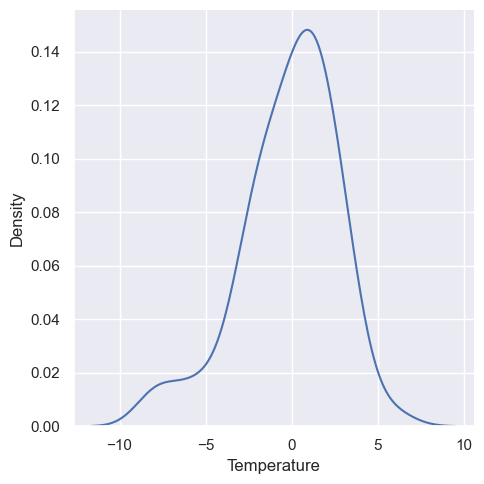

In [559]:
sns.displot(residuals,kind="kde")

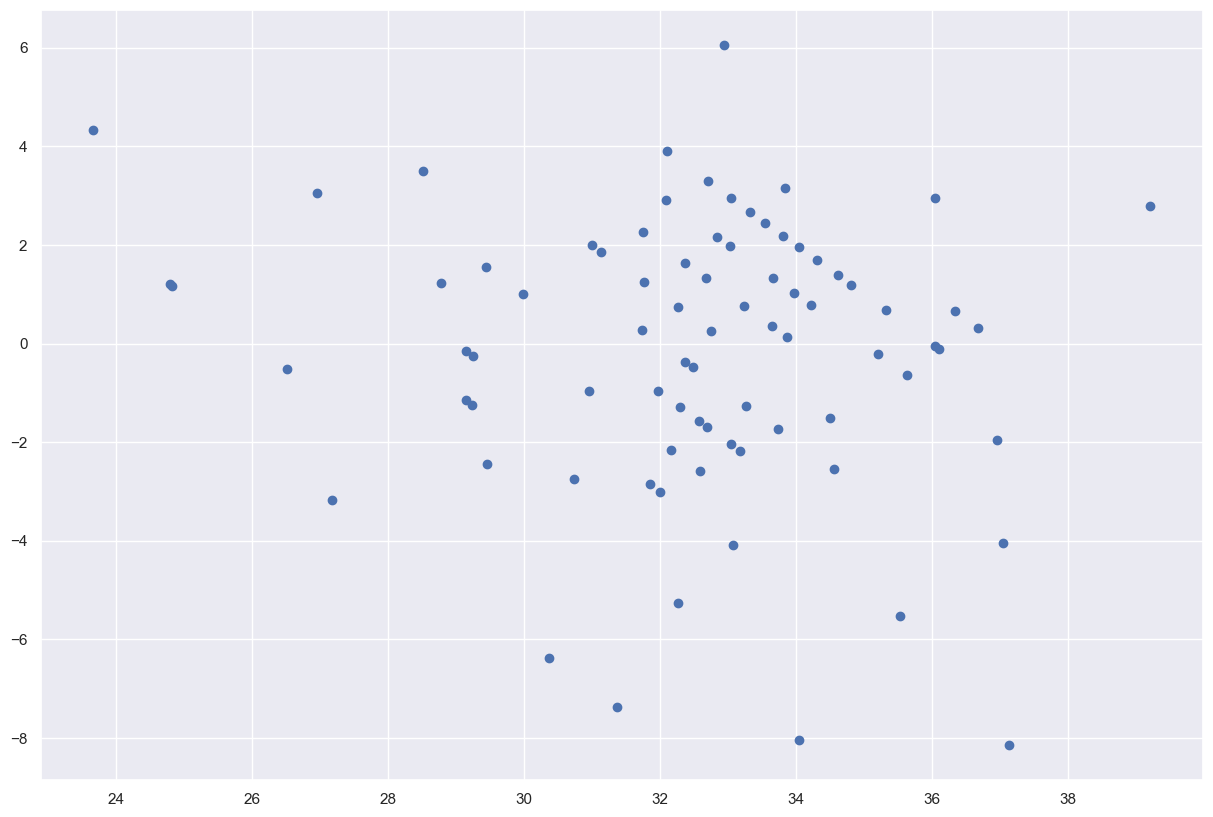

In [560]:
plt.scatter(ridge_pred,residuals)

In [561]:
print(mean_squared_error(y_test,ridge_pred))
print(mean_absolute_error(y_test,ridge_pred))
print(np.sqrt(mean_squared_error(y_test,ridge_pred)))

7.700169527845216
2.1363570878417484
2.7749179317315344


In [562]:
score=r2_score(y_test,reg_pred)
score

0.4424354585867669

In [563]:
## Adjusted R square
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-x_test_scaled.shape[1]-1)

0.33425129383494556

In [564]:
lasso=Lasso()
lasso

Lasso()

In [565]:
lasso.fit(x_train_scaled,y_train)

Lasso()

In [566]:
print(lasso.coef_)

[ 0.         -0.         -0.88423537 -0.         -0.          0.88313134
  0.          0.          0.          0.          0.          0.
  0.        ]


In [567]:
print(lasso.intercept_)

32.074074074074076


In [568]:
lasso_pred=lasso.predict(x_test_scaled)

In [569]:
lasso_pred

array([31.99263189, 33.56261409, 33.16968133, 29.35085197, 29.41532603,
       33.00570181, 32.24618859, 33.57987995, 32.17946599, 33.03180429,
       32.43352237, 32.64830012, 34.42463082, 31.61671515, 32.83763259,
       33.35142638, 29.33942467, 34.79854886, 32.38506498, 29.63719153,
       32.36854863, 32.21265622, 32.60134175, 31.81897394, 31.16330572,
       32.75364414, 32.88409128, 32.36320974, 32.04108928, 31.96868565,
       33.24608236, 33.07067555, 33.54659742, 32.57214892, 31.41161583,
       30.06340682, 32.79726231, 32.13550568, 33.36310351, 33.22497663,
       33.25167109, 34.07840658, 33.22831682, 33.75728546, 32.90619636,
       34.59903828, 32.34644356, 33.72050521, 31.73648451, 31.41845375,
       32.26170559, 35.46055533, 32.15686124, 33.60932262, 29.07618954,
       34.41195434, 33.23999395, 32.50358516, 29.88575148, 32.20406944,
       32.0385909 , 31.44605525, 29.20463799, 34.49394409, 33.4095622 ,
       30.24824223, 31.37474327, 30.84852284, 34.06622977, 30.49

Text(0, 0.5, 'Test Predicted Data')

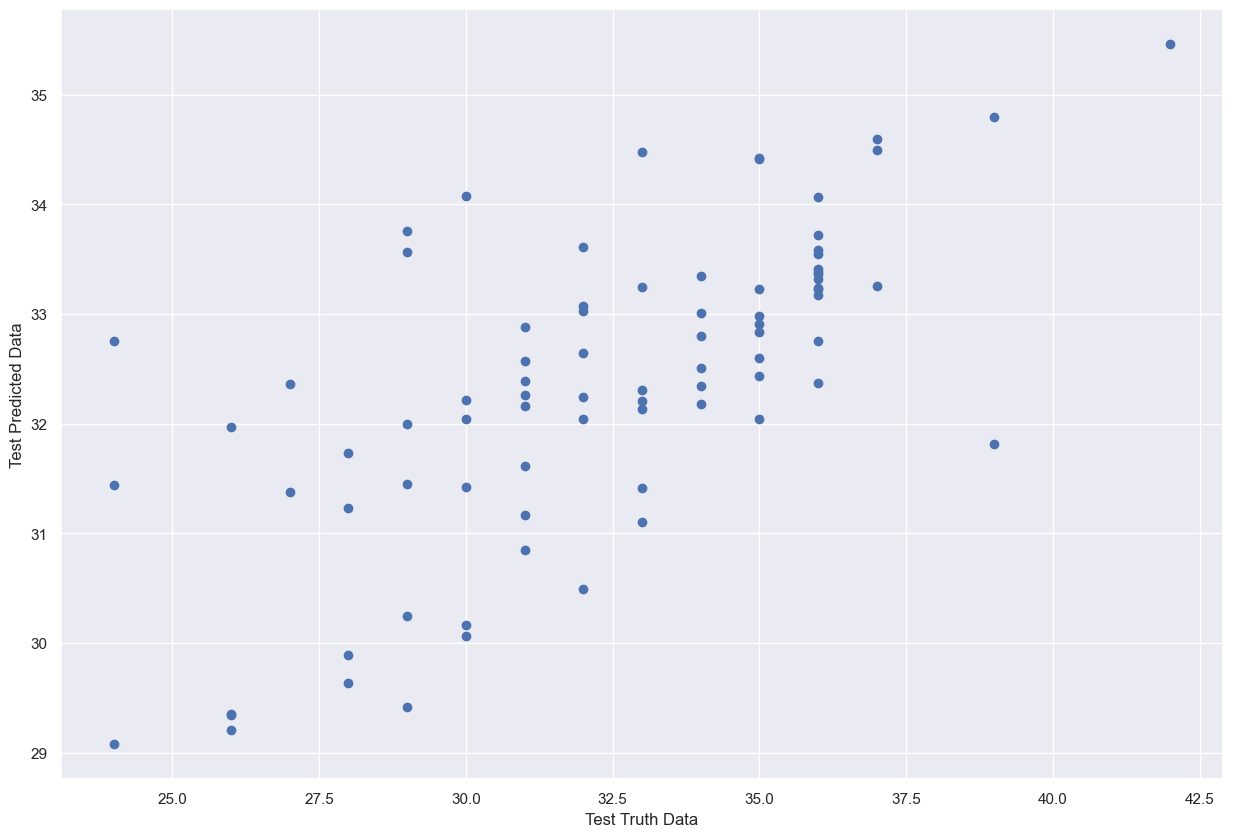

In [570]:
#if we are plotting  y_test,reg_pred relation should be linear
plt.scatter(y_test,lasso_pred)
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")

In [571]:
residuals=y_test-lasso_pred

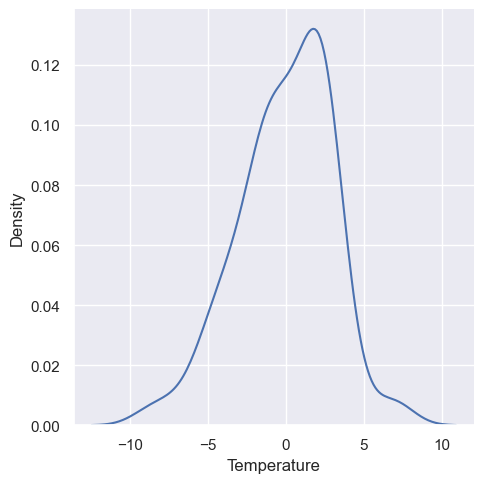

In [572]:
sns.displot(residuals,kind="kde")

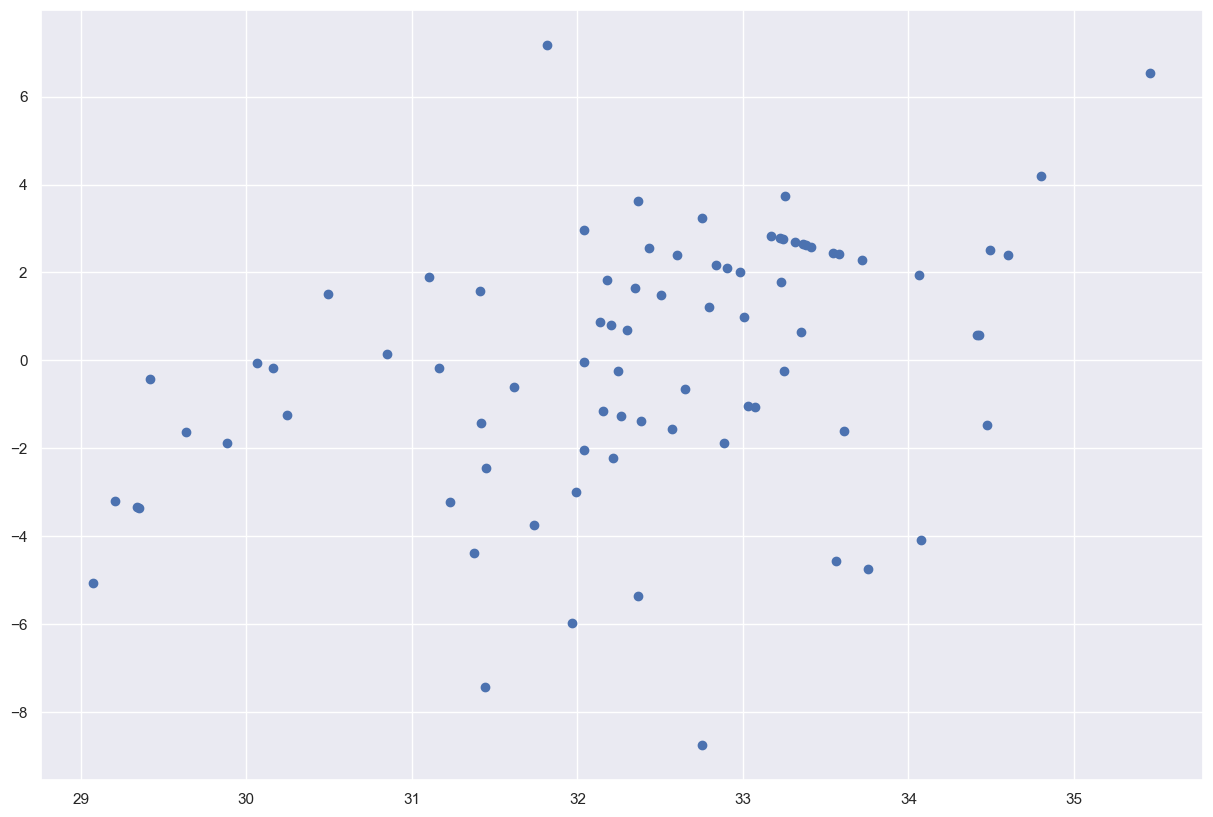

In [573]:
plt.scatter(lasso_pred,residuals)

In [574]:
print(mean_squared_error(y_test,lasso_pred))
print(mean_absolute_error(y_test,lasso_pred))
print(np.sqrt(mean_squared_error(y_test,lasso_pred)))

8.69462464944341
2.370968686727018
2.9486648927003234


In [575]:
score=r2_score(y_test,lasso_pred)
score

0.3719123543887275

In [576]:
## Adjusted R square
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-x_test_scaled.shape[1]-1)

0.250044602255197

In [577]:
elastic_net=ElasticNet()

In [578]:
elastic_net.fit(x_train_scaled,y_train)

ElasticNet()

In [579]:
print(elastic_net.coef_)

[-0.         -0.         -0.77155493 -0.27327033 -0.02945645  0.70980198
  0.11177449  0.          0.20914599  0.04593431  0.12829249  0.
  0.        ]


In [580]:
print(elastic_net.intercept_)

32.074074074074076


In [581]:
elastic_net_pred=elastic_net.predict(x_test_scaled)

In [582]:
elastic_net_pred

array([31.9573208 , 33.23686908, 33.35699564, 28.69175409, 29.50702659,
       33.21952486, 31.75246849, 33.96237735, 32.10800305, 32.71913539,
       32.6464949 , 32.70818669, 34.28160866, 31.98757886, 32.58127398,
       33.38088877, 29.25544946, 35.1329971 , 32.41345187, 28.81942678,
       31.92062398, 32.01321369, 32.87611371, 32.19248582, 30.76147509,
       32.77885483, 32.9241576 , 31.80574265, 31.84088675, 32.63570681,
       33.35824365, 32.97725238, 33.16526411, 32.6259555 , 31.48228091,
       29.90876877, 32.28704956, 31.73349961, 33.28556103, 32.87586141,
       33.61368581, 34.06687234, 33.48616338, 34.31378768, 32.80354959,
       35.56194932, 31.98083723, 34.20080511, 31.06352775, 31.3703163 ,
       32.33015611, 36.68465163, 32.02910227, 33.90164802, 29.13016242,
       35.33664404, 33.44975962, 32.59500157, 29.89482886, 32.07728159,
       32.39209933, 31.39172713, 28.33121558, 35.11153428, 34.62534381,
       30.33956758, 30.58992082, 30.41863187, 34.79501455, 29.86

Text(0, 0.5, 'Test Predicted Data')

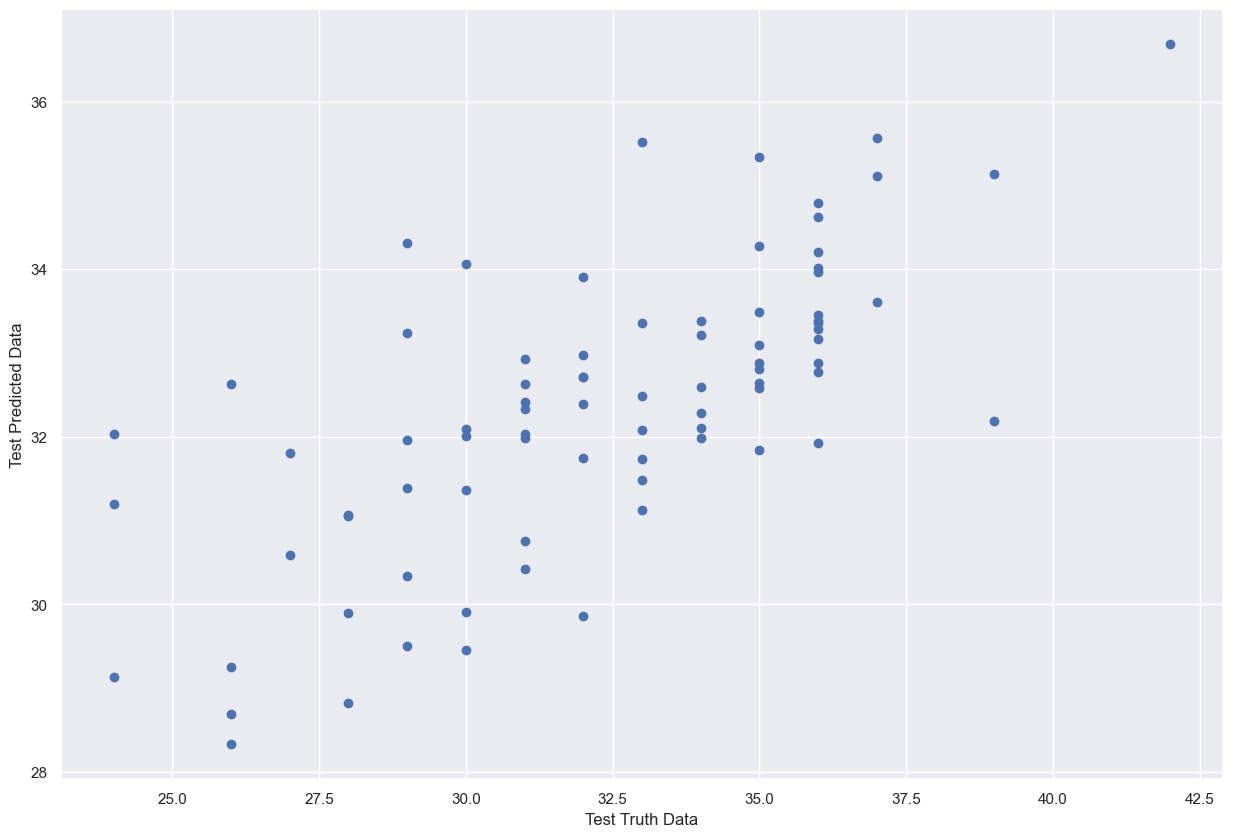

In [583]:
#if we are plotting  y_test,reg_pred relation should be linear
plt.scatter(y_test,elastic_net_pred)
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")

In [584]:
residuals=y_test-elastic_net_pred

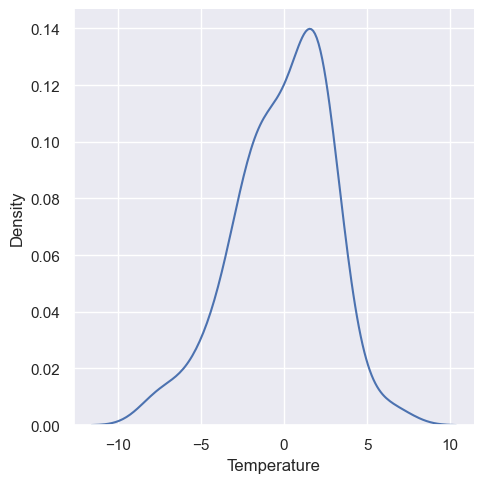

In [585]:
sns.displot(residuals,kind="kde")

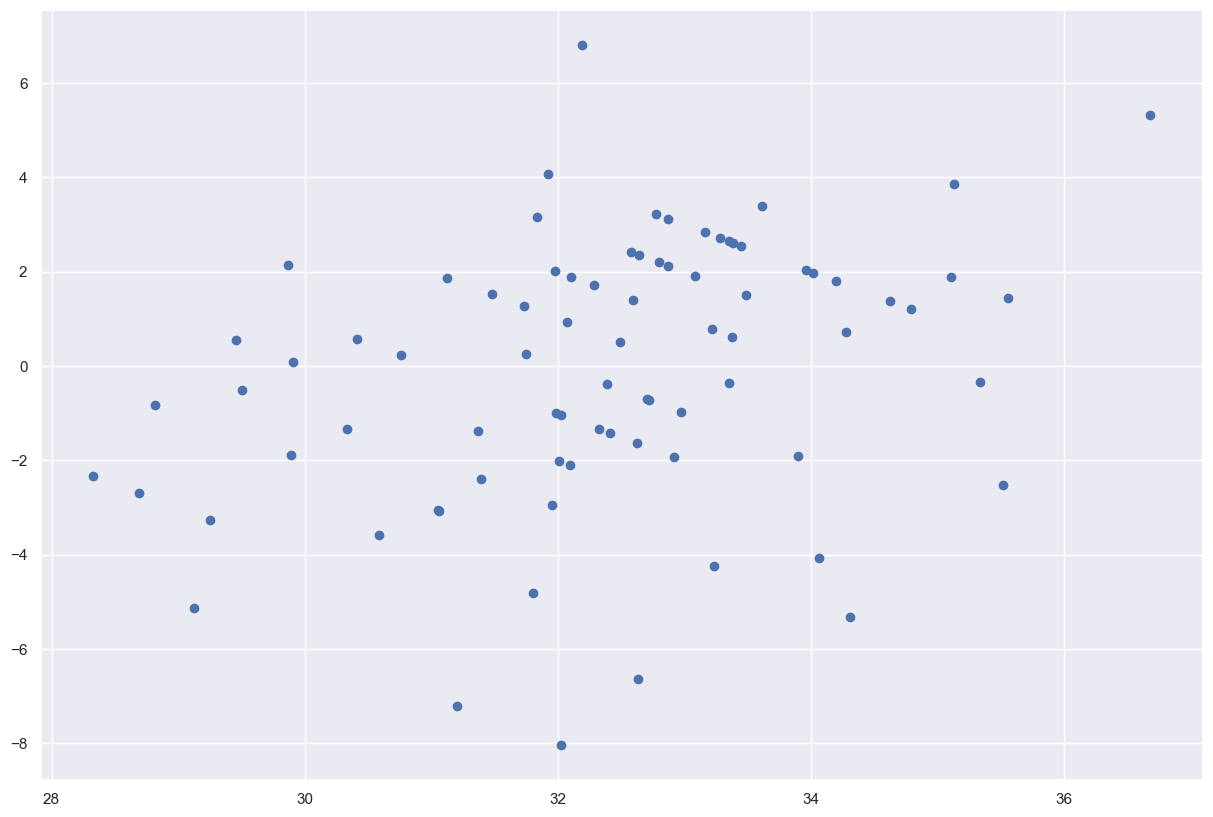

In [586]:
plt.scatter(elastic_net_pred,residuals)

In [587]:
print(mean_squared_error(y_test,elastic_net_pred))
print(mean_absolute_error(y_test,elastic_net_pred))
print(np.sqrt(mean_squared_error(y_test,elastic_net_pred)))

7.918267418307838
2.279648251186519
2.813941616009088


In [588]:
score=r2_score(y_test,elastic_net_pred)
score

0.4279953257782334

In [589]:
## Adjusted R square
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-x_test_scaled.shape[1]-1)

0.317009344212816